In [131]:
# Importowanie bibliotek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np



In [132]:
nazwy_kolumn_pl = [
    "klasa",  # class
    "ksztalt-kapelusza",  # cap-shape
    "powierzchnia-kapelusza",  # cap-surface
    "kolor-kapelusza",  # cap-color
    "siniaki",  # bruises
    "zapach",  # odor
    "mocowanie-blaszek",  # gill-attachment
    "odstępy-blaszek",  # gill-spacing
    "rozmiar-blaszek",  # gill-size
    "kolor-blaszek",  # gill-color
    "ksztalt-trzonu",  # stalk-shape
    "korzeń-trzonu",  # stalk-root
    "powierzchnia-trzonu-nad-pierscieniem",  # stalk-surface-above-ring
    "powierzchnia-trzonu-pod-pierscieniem",  # stalk-surface-below-ring
    "kolor-trzonu-nad-pierscieniem",  # stalk-color-above-ring
    "kolor-trzonu-pod-pierscieniem",  # stalk-color-below-ring
    "typ-zasłony",  # veil-type
    "kolor-zasłony",  # veil-color
    "liczba-pierscieni",  # ring-number
    "typ-pierscienia",  # ring-type
    "kolor-zarodników",  # spore-print-color
    "populacja",  # population
    "siedlisko"  # habitat
]


In [133]:
# wczytanie danych i zamiana nazw kolumn na polskie
df = pd.read_csv('/Users/jakub/Desktop/Data Mining/Projekt/mushroom/agaricus-lepiota.data', header=None)
df.columns = nazwy_kolumn_pl

In [134]:
# usuniecie wierszy z pustymi wartosciami   
df.dropna()

,klasa,ksztalt-kapelusza,powierzchnia-kapelusza,kolor-kapelusza,siniaki,zapach,mocowanie-blaszek,odstępy-blaszek,rozmiar-blaszek,kolor-blaszek,ksztalt-trzonu,korzeń-trzonu,powierzchnia-trzonu-nad-pierscieniem,powierzchnia-trzonu-pod-pierscieniem,kolor-trzonu-nad-pierscieniem,kolor-trzonu-pod-pierscieniem,typ-zasłony,kolor-zasłony,liczba-pierscieni,typ-pierscienia,kolor-zarodników,populacja,siedlisko
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [135]:
# podstawowe statystyki dot. danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   klasa                                 8124 non-null   object
 1   ksztalt-kapelusza                     8124 non-null   object
 2   powierzchnia-kapelusza                8124 non-null   object
 3   kolor-kapelusza                       8124 non-null   object
 4   siniaki                               8124 non-null   object
 5   zapach                                8124 non-null   object
 6   mocowanie-blaszek                     8124 non-null   object
 7   odstępy-blaszek                       8124 non-null   object
 8   rozmiar-blaszek                       8124 non-null   object
 9   kolor-blaszek                         8124 non-null   object
 10  ksztalt-trzonu                        8124 non-null   object
 11  korzeń-trzonu                 

In [136]:
# ilosc wierszy i kolumn
df.shape 

(8124, 23)

In [137]:
# Sprawdzenie wartości unikatowych
# p = poisonous = trujące
# e = edible = jadalne
df['klasa'].unique()

array(['p', 'e'], dtype=object)

<AxesSubplot: xlabel='klasa', ylabel='Count'>

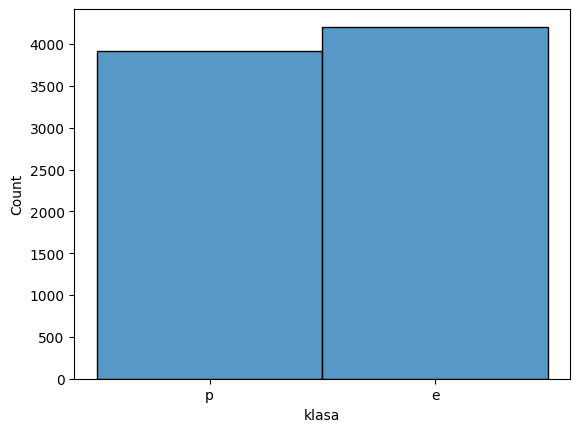

In [138]:
# Sprawdzenie rozkładu grzybów trujących i jadalnych
sns.histplot(df['klasa'])

In [139]:
X = df.drop('klasa', axis=1)
y = df['klasa']

# Zamiana atrybutów na wartości numeryczne [0-1] 
X = pd.get_dummies(X)
X.head()



,ksztalt-kapelusza_b,ksztalt-kapelusza_c,ksztalt-kapelusza_f,ksztalt-kapelusza_k,ksztalt-kapelusza_s,ksztalt-kapelusza_x,powierzchnia-kapelusza_f,powierzchnia-kapelusza_g,powierzchnia-kapelusza_s,powierzchnia-kapelusza_y,kolor-kapelusza_b,kolor-kapelusza_c,kolor-kapelusza_e,kolor-kapelusza_g,kolor-kapelusza_n,kolor-kapelusza_p,kolor-kapelusza_r,kolor-kapelusza_u,kolor-kapelusza_w,kolor-kapelusza_y,siniaki_f,siniaki_t,zapach_a,zapach_c,zapach_f,zapach_l,zapach_m,zapach_n,zapach_p,zapach_s,zapach_y,mocowanie-blaszek_a,mocowanie-blaszek_f,odstępy-blaszek_c,odstępy-blaszek_w,rozmiar-blaszek_b,rozmiar-blaszek_n,kolor-blaszek_b,kolor-blaszek_e,kolor-blaszek_g,kolor-blaszek_h,kolor-blaszek_k,kolor-blaszek_n,kolor-blaszek_o,kolor-blaszek_p,kolor-blaszek_r,kolor-blaszek_u,kolor-blaszek_w,kolor-blaszek_y,ksztalt-trzonu_e,ksztalt-trzonu_t,korzeń-trzonu_?,korzeń-trzonu_b,korzeń-trzonu_c,korzeń-trzonu_e,korzeń-trzonu_r,powierzchnia-trzonu-nad-pierscieniem_f,powierzchnia-trzonu-nad-pierscieniem_k,powierzchnia-trzonu-nad-pierscieniem_s,powierzchnia-trzonu-nad-pierscieniem_y,powierzchnia-trzonu-pod-pierscieniem_f,powierzchnia-trzonu-pod-pierscieniem_k,powierzchnia-trzonu-pod-pierscieniem_s,powierzchnia-trzonu-pod-pierscieniem_y,kolor-trzonu-nad-pierscieniem_b,kolor-trzonu-nad-pierscieniem_c,kolor-trzonu-nad-pierscieniem_e,kolor-trzonu-nad-pierscieniem_g,kolor-trzonu-nad-pierscieniem_n,kolor-trzonu-nad-pierscieniem_o,kolor-trzonu-nad-pierscieniem_p,kolor-trzonu-nad-pierscieniem_w,kolor-trzonu-nad-pierscieniem_y,kolor-trzonu-pod-pierscieniem_b,kolor-trzonu-pod-pierscieniem_c,kolor-trzonu-pod-pierscieniem_e,kolor-trzonu-pod-pierscieniem_g,kolor-trzonu-pod-pierscieniem_n,kolor-trzonu-pod-pierscieniem_o,kolor-trzonu-pod-pierscieniem_p,kolor-trzonu-pod-pierscieniem_w,kolor-trzonu-pod-pierscieniem_y,typ-zasłony_p,kolor-zasłony_n,kolor-zasłony_o,kolor-zasłony_w,kolor-zasłony_y,liczba-pierscieni_n,liczba-pierscieni_o,liczba-pierscieni_t,typ-pierscienia_e,typ-pierscienia_f,typ-pierscienia_l,typ-pierscienia_n,typ-pierscienia_p,kolor-zarodników_b,kolor-zarodników_h,kolor-zarodników_k,kolor-zarodników_n,kolor-zarodników_o,kolor-zarodników_r,kolor-zarodników_u,kolor-zarodników_w,kolor-zarodników_y,populacja_a,populacja_c,populacja_n,populacja_s,populacja_v,populacja_y,siedlisko_d,siedlisko_g,siedlisko_l,siedlisko_m,siedlisko_p,siedlisko_u,siedlisko_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [140]:
# Zamiana atrybutów na wartości numeryczne [0-1] 
atrybuty = pd.get_dummies(X)
atrybuty.head()

,ksztalt-kapelusza_b,ksztalt-kapelusza_c,ksztalt-kapelusza_f,ksztalt-kapelusza_k,ksztalt-kapelusza_s,ksztalt-kapelusza_x,powierzchnia-kapelusza_f,powierzchnia-kapelusza_g,powierzchnia-kapelusza_s,powierzchnia-kapelusza_y,kolor-kapelusza_b,kolor-kapelusza_c,kolor-kapelusza_e,kolor-kapelusza_g,kolor-kapelusza_n,kolor-kapelusza_p,kolor-kapelusza_r,kolor-kapelusza_u,kolor-kapelusza_w,kolor-kapelusza_y,siniaki_f,siniaki_t,zapach_a,zapach_c,zapach_f,zapach_l,zapach_m,zapach_n,zapach_p,zapach_s,zapach_y,mocowanie-blaszek_a,mocowanie-blaszek_f,odstępy-blaszek_c,odstępy-blaszek_w,rozmiar-blaszek_b,rozmiar-blaszek_n,kolor-blaszek_b,kolor-blaszek_e,kolor-blaszek_g,kolor-blaszek_h,kolor-blaszek_k,kolor-blaszek_n,kolor-blaszek_o,kolor-blaszek_p,kolor-blaszek_r,kolor-blaszek_u,kolor-blaszek_w,kolor-blaszek_y,ksztalt-trzonu_e,ksztalt-trzonu_t,korzeń-trzonu_?,korzeń-trzonu_b,korzeń-trzonu_c,korzeń-trzonu_e,korzeń-trzonu_r,powierzchnia-trzonu-nad-pierscieniem_f,powierzchnia-trzonu-nad-pierscieniem_k,powierzchnia-trzonu-nad-pierscieniem_s,powierzchnia-trzonu-nad-pierscieniem_y,powierzchnia-trzonu-pod-pierscieniem_f,powierzchnia-trzonu-pod-pierscieniem_k,powierzchnia-trzonu-pod-pierscieniem_s,powierzchnia-trzonu-pod-pierscieniem_y,kolor-trzonu-nad-pierscieniem_b,kolor-trzonu-nad-pierscieniem_c,kolor-trzonu-nad-pierscieniem_e,kolor-trzonu-nad-pierscieniem_g,kolor-trzonu-nad-pierscieniem_n,kolor-trzonu-nad-pierscieniem_o,kolor-trzonu-nad-pierscieniem_p,kolor-trzonu-nad-pierscieniem_w,kolor-trzonu-nad-pierscieniem_y,kolor-trzonu-pod-pierscieniem_b,kolor-trzonu-pod-pierscieniem_c,kolor-trzonu-pod-pierscieniem_e,kolor-trzonu-pod-pierscieniem_g,kolor-trzonu-pod-pierscieniem_n,kolor-trzonu-pod-pierscieniem_o,kolor-trzonu-pod-pierscieniem_p,kolor-trzonu-pod-pierscieniem_w,kolor-trzonu-pod-pierscieniem_y,typ-zasłony_p,kolor-zasłony_n,kolor-zasłony_o,kolor-zasłony_w,kolor-zasłony_y,liczba-pierscieni_n,liczba-pierscieni_o,liczba-pierscieni_t,typ-pierscienia_e,typ-pierscienia_f,typ-pierscienia_l,typ-pierscienia_n,typ-pierscienia_p,kolor-zarodników_b,kolor-zarodników_h,kolor-zarodników_k,kolor-zarodników_n,kolor-zarodników_o,kolor-zarodników_r,kolor-zarodników_u,kolor-zarodników_w,kolor-zarodników_y,populacja_a,populacja_c,populacja_n,populacja_s,populacja_v,populacja_y,siedlisko_d,siedlisko_g,siedlisko_l,siedlisko_m,siedlisko_p,siedlisko_u,siedlisko_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [141]:
enkoder_klasy = LabelEncoder()
y = enkoder_klasy.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


In [142]:
##podział losowy
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [143]:
######proste drzewo
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

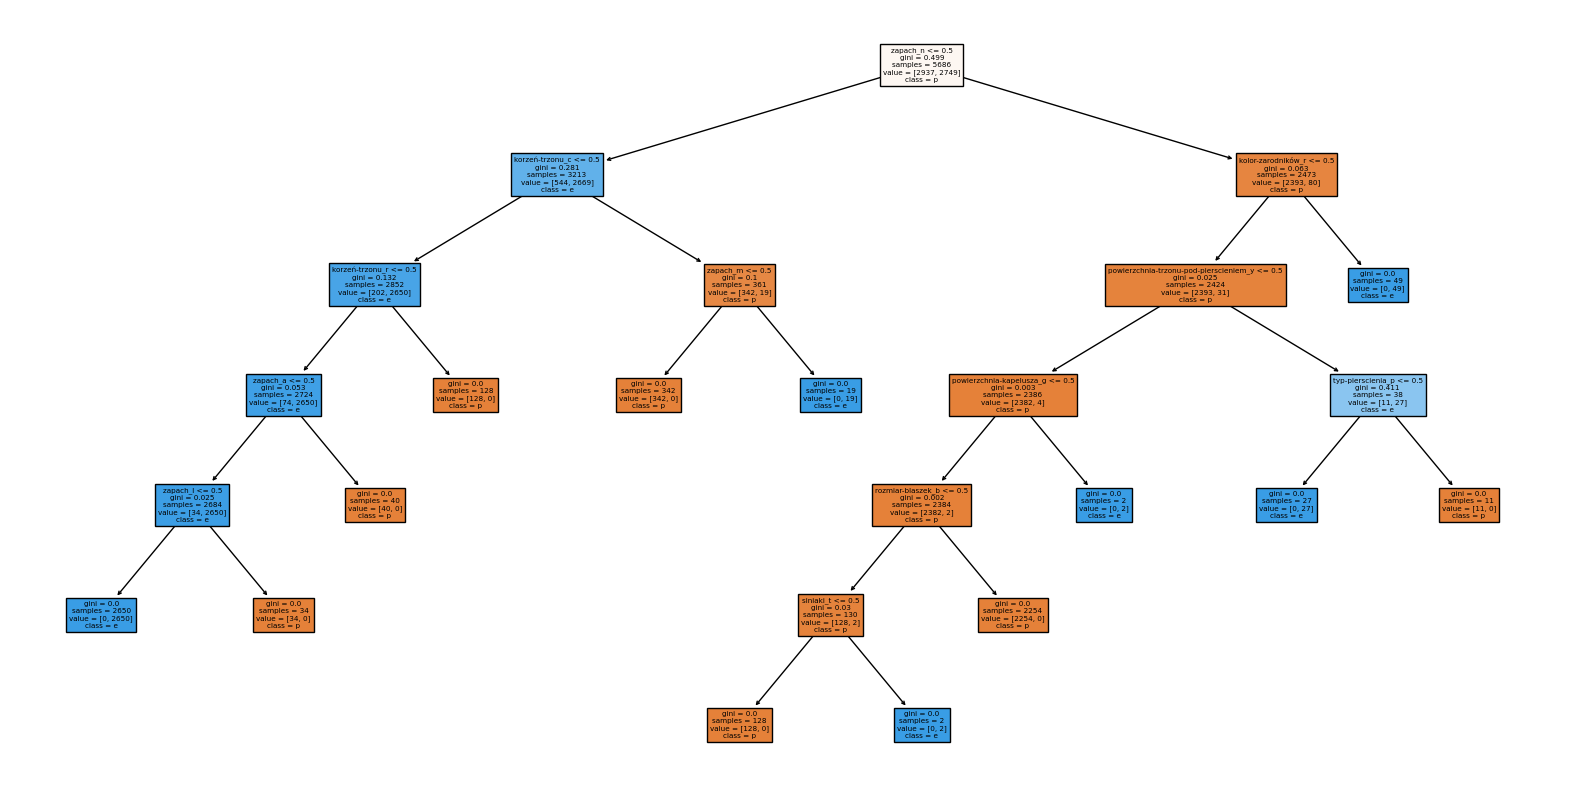

In [144]:
# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['p', 'e'], filled=True)
plt.show()

In [145]:
# Predykcja i ocena modelu
y_pred = decision_tree.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy: 1.0


In [146]:
# Predykcja i ocena modelu
y_pred = decision_tree.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy: 1.0


In [147]:
#### Czesc 2 - pruning i ROC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np

# Uzyskanie wskaźników złożoności i błędu walidacyjnego
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities



In [148]:
# Przeprowadzenie pruning dla różnych wartości ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [149]:
# Wybór optymalnego drzewa na podstawie minimalizacji x_error
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
optimal_index = np.argmax(test_scores)  # Znajdź indeks z najwyższą dokładnością na zbiorze testowym
optimal_tree = clfs[optimal_index]


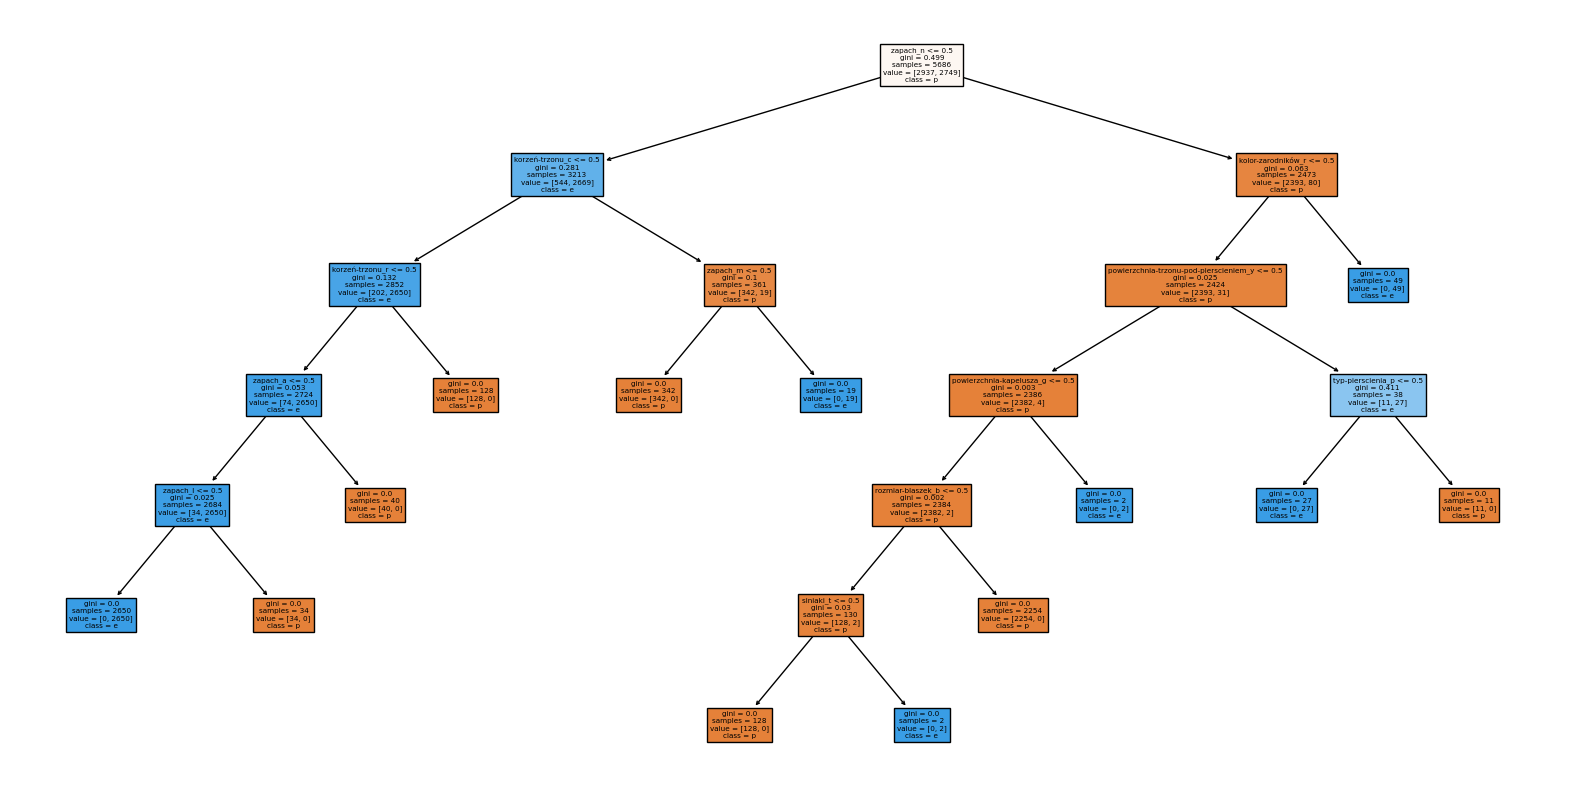

In [150]:
# Wizualizacja przyciętego drzewa
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, feature_names=X.columns, class_names=['p', 'e'], filled=True)
plt.show()

In [151]:
# Predykcja prawdopodobieństwa i obliczenie krzywej ROC
y_prob = optimal_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

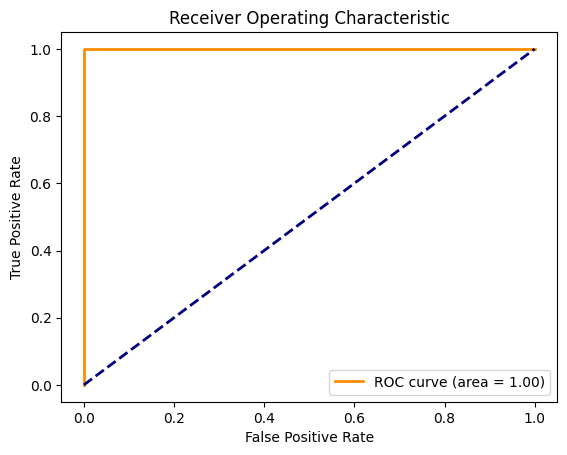

In [152]:
# Wizualizacja krzywej ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [153]:
# Wyniki
print(f"Optimal ccp_alpha: {ccp_alphas[optimal_index]}")
print(f"Train Accuracy: {train_scores[optimal_index]:.2f}")
print(f"Test Accuracy: {test_scores[optimal_index]:.2f}")

Optimal ccp_alpha: 0.0
Train Accuracy: 1.00
Test Accuracy: 1.00
